This notebook is a simulation of 5000 ms of 400 independent descending commands following a gamma distribution with mean of 12 ms and order 10 and the Soleus muscle (800 motoneurons). Each descending command connects to approximately 30 % of the motor units.

In [1]:
import sys
sys.path.insert(0, '..')
import time
import matplotlib.pyplot as plt
%matplotlib inline  
import numpy as np

from Configuration import Configuration
from MotorUnitPool import MotorUnitPool
from NeuralTract import NeuralTract
from SynapsesFactory import SynapsesFactory


In [2]:
conf = Configuration('confMNPoolWithDescendingCommand.rmto')
conf.simDuration_ms = 5000 # Here I change simulation duration without changing the Configuration file.

In [3]:
pools = dict()
pools[0] = MotorUnitPool(conf, 'SOL')
pools[1] = NeuralTract(conf, 'CMExt')
Syn = SynapsesFactory(conf, pools)
del Syn

Motor Unit Pool SOL built
Descending Command CMExt built
All the 95788 synapses were built


In [4]:
t = np.arange(0.0, conf.simDuration_ms, conf.timeStep_ms)

In [5]:
dendV = np.zeros_like(t)
somaV = np.zeros_like(t)

tic = time.clock()
for i in xrange(0, len(t)-1):
    pools[1].atualizePool(t[i])
    pools[0].atualizeMotorUnitPool(t[i])
    dendV[i] = pools[0].unit[2].v_mV[0]
    somaV[i] = pools[0].unit[2].v_mV[1] 
toc = time.clock()
print str(toc - tic) + ' seconds'

10435.49023 seconds


The spike times of all descending commands along the 5000 ms of simulation is shown in Fig. \ref{fig:spikesDescMN}.

In [6]:
pools[0].listSpikes()
pools[1].listSpikes()

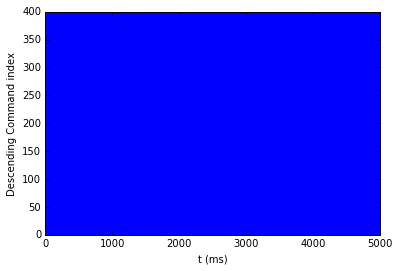

In [7]:
plt.figure()
plt.plot(pools[1].poolTerminalSpikes[:, 0],
         pools[1].poolTerminalSpikes[:, 1]+1, '.')

plt.xlabel('t (ms)')
plt.ylabel('Descending Command index')

The spike times of all descending commands along the last 500 ms of simulation is shown in Fig. \ref{fig:spikesDescMNLast}.

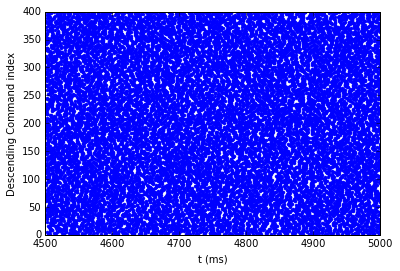

In [8]:
plt.figure()
plt.plot(pools[1].poolTerminalSpikes[pools[1].poolTerminalSpikes[:, 0]>4500, 0],
         pools[1].poolTerminalSpikes[pools[1].poolTerminalSpikes[:, 0]>4500, 1]+1, '.')
plt.xlabel('t (ms)')
plt.ylabel('Descending Command index')

The spike times of the MNs along the 5000 ms of simulation is shown in Fig. \ref{fig:spikesMNMN}.

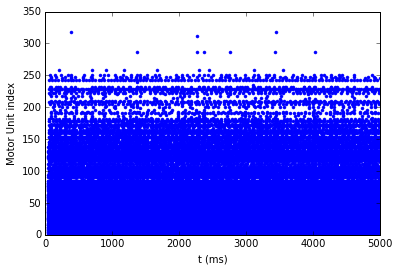

In [9]:
plt.figure()
plt.plot(pools[0].poolTerminalSpikes[:, 0],
         pools[0].poolTerminalSpikes[:, 1]+1, '.')
plt.xlabel('t (ms)')
plt.ylabel('Motor Unit index')

The spike times of the MNs along the last 500 ms of simulation is shown in Fig. \ref{fig:spikesMNMNLast}.

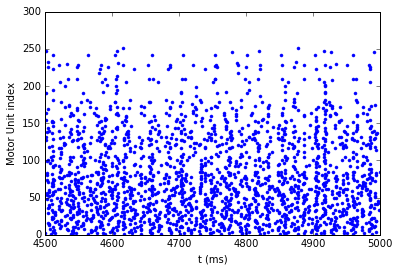

In [10]:
plt.figure()
plt.plot(pools[0].poolTerminalSpikes[pools[0].poolTerminalSpikes[:, 0]>4500, 0],
         pools[0].poolTerminalSpikes[pools[0].poolTerminalSpikes[:, 0]>4500, 1]+1, '.')
plt.xlabel('t (ms)')
plt.ylabel('Motor Unit index')

The muscle force during the simulation \ref{fig:force}.

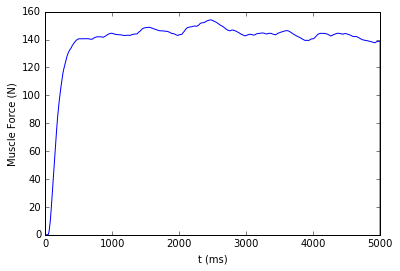

In [11]:
plt.figure()
plt.plot(t, pools[0].Muscle.force, '-')
plt.xlabel('t (ms)')
plt.ylabel('Muscle Force (N)')

The membrane potential of the dendrite compartment is shown in Fig.\ref{fig:dendV}.

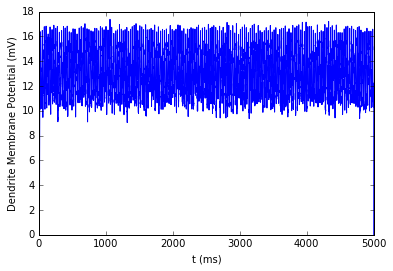

In [12]:
plt.figure()
plt.plot(t, dendV, '-')
plt.xlabel('t (ms)')
plt.ylabel('Dendrite Membrane Potential (mV)')

The membrane potential of the soma compartment is shown in Fig.\ref{fig:somaV}.

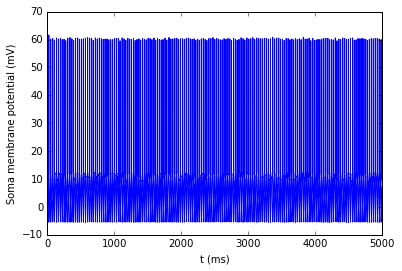

In [13]:
plt.figure()
plt.plot(t, somaV, '-')
plt.xlabel('t (ms)')
plt.ylabel('Soma membrane potential (mV)')

The membrane potential of the soma compartment in the last 300 ms is shown in Fig.\ref{fig:somaVLast}.

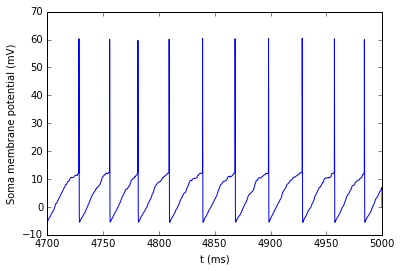

In [14]:
plt.figure()
plt.plot(t[t>4700], somaV[t>4700], '-')
plt.xlabel('t (ms)')
plt.ylabel('Soma membrane potential (mV)')